In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

In [175]:
df = pd.read_csv("Walmart_Sales.csv")

In [176]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [177]:
df.shape

(6435, 8)

In [178]:
df.duplicated().sum()

0

In [179]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [180]:
df = df.drop(columns=["Store", "Date"])

In [181]:
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106
3,1409727.59,0,46.63,2.561,211.319643,8.106
4,1554806.68,0,46.50,2.625,211.350143,8.106


In [182]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

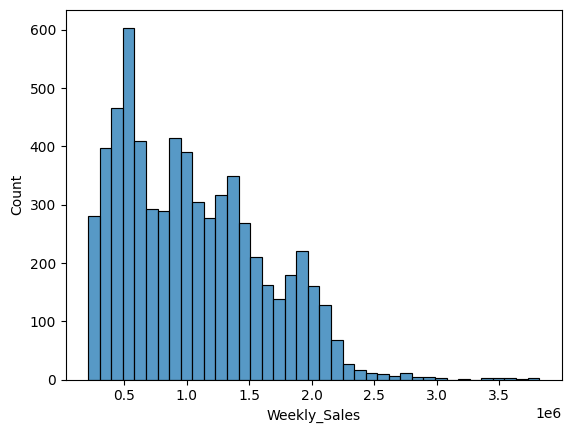

In [183]:
sns.histplot(data=df, x= "Weekly_Sales")

<Axes: xlabel='Temperature', ylabel='Count'>

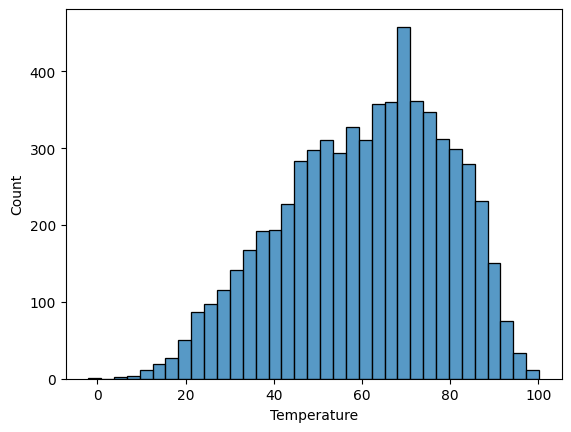

In [184]:
sns.histplot(data=df, x= "Temperature")

<Axes: xlabel='Fuel_Price', ylabel='Count'>

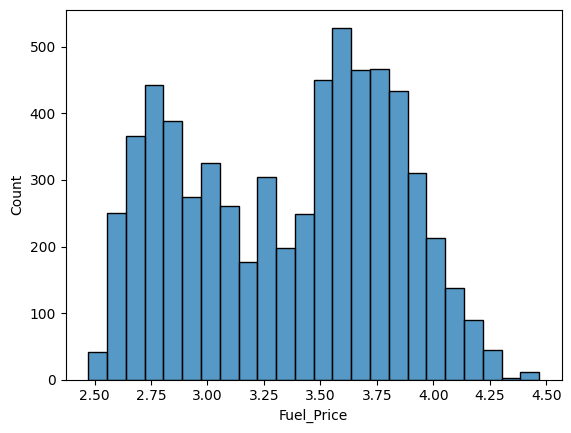

In [185]:
sns.histplot(data=df, x= "Fuel_Price")

<Axes: xlabel='CPI', ylabel='Count'>

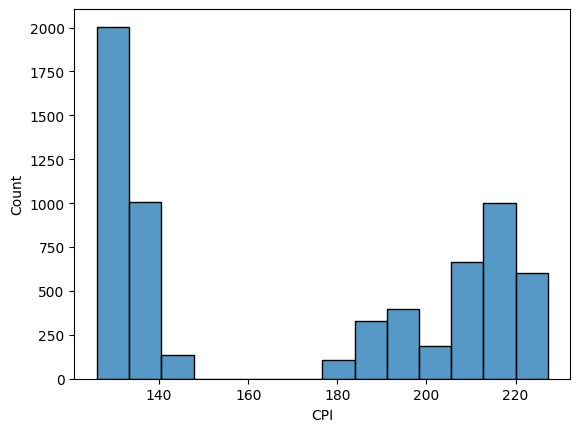

In [186]:
sns.histplot(data=df, x= "CPI")

<Axes: xlabel='Unemployment', ylabel='Count'>

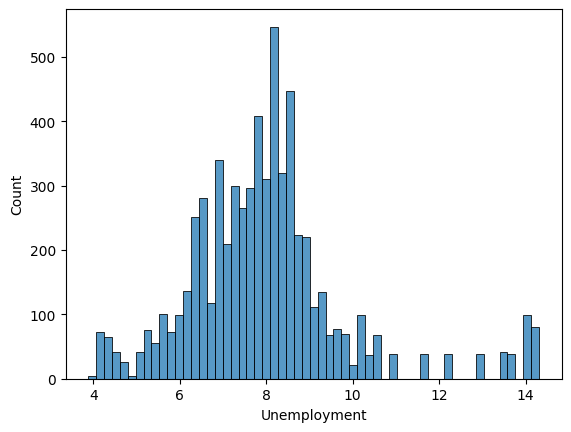

In [187]:
sns.histplot(data=df, x= "Unemployment")

# effect of ambient temperature (some effect)

In [188]:
X = df["Temperature"]
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data_temp = pd.concat([X_train, y_train], axis = 1)
ols_formula_temp = "Weekly_Sales ~ Temperature"
model_temp = ols(formula=ols_formula_temp, data=ols_data_temp).fit()
print(model_temp.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.24e-07
Time:                        09:27:34   Log-Likelihood:                -66059.
No. Observations:                4504   AIC:                         1.321e+05
Df Residuals:                    4502   BIC:                         1.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.186e+06   2.89e+04     41.040      

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

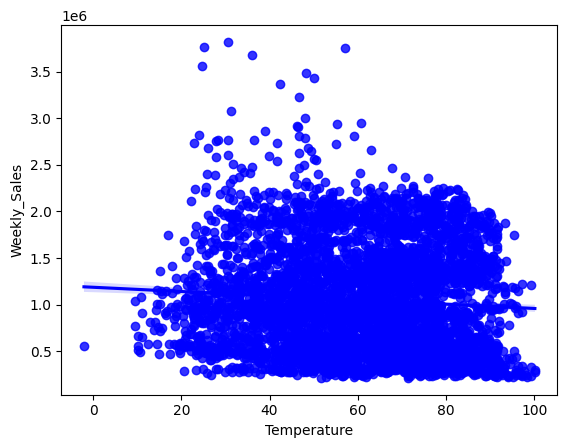

In [189]:
sns.regplot(x="Temperature", y="Weekly_Sales", data=ols_data_temp, color='blue')

<Axes: ylabel='Count'>

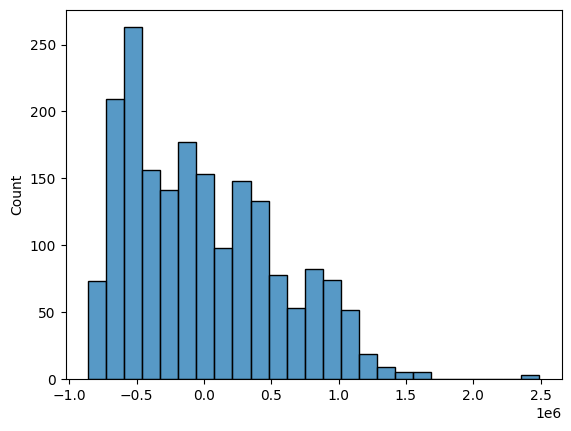

In [190]:
y_pred_temp = model_temp.predict(X_test)
residue = y_test - y_pred_temp
sns.histplot(residue)

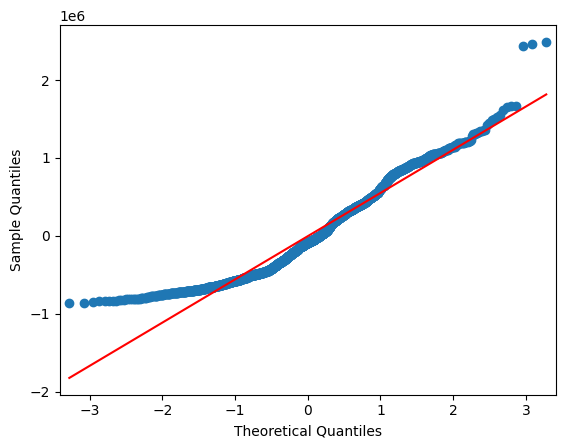

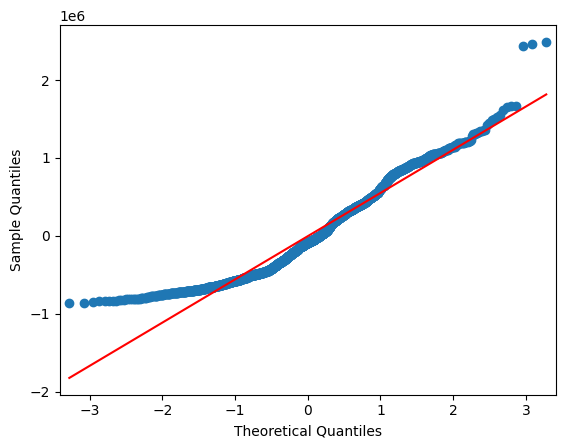

In [191]:
qqplot(residue, line='s')

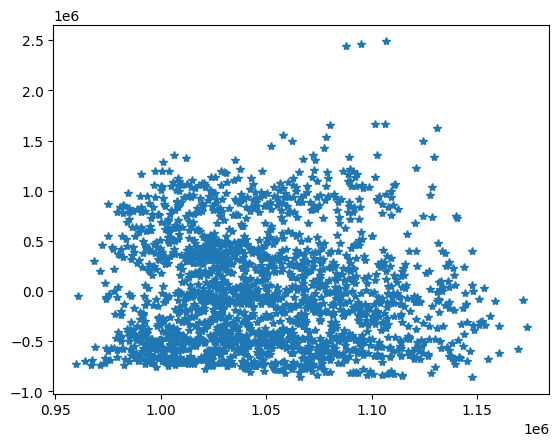

In [192]:
plt.plot(y_pred_temp, residue, "*")

# effect of fuel (No effect --> discard)

In [193]:
X = df["Fuel_Price"]
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data_fuel = pd.concat([X_train, y_train], axis = 1)
ols_formula_fuel = "Weekly_Sales ~ Fuel_Price"
model_fuel = ols(formula=ols_formula_fuel, data=ols_data_fuel).fit()
print(model_fuel.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07035
Date:                Wed, 10 Jul 2024   Prob (F-statistic):              0.791
Time:                        09:27:35   Log-Likelihood:                -66061.
No. Observations:                4504   AIC:                         1.321e+05
Df Residuals:                    4502   BIC:                         1.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.059e+06   6.25e+04     16.954      0.0

# effect of CPI (some effect)

In [194]:
X = df["CPI"]
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data_cpi = pd.concat([X_train, y_train], axis = 1)
ols_formula_cpi = "Weekly_Sales ~ CPI"
model_cpi = ols(formula=ols_formula_cpi, data=ols_data_cpi).fit()
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     23.61
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.22e-06
Time:                        09:27:35   Log-Likelihood:                -65967.
No. Observations:                4504   AIC:                         1.319e+05
Df Residuals:                    4502   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.211e+06    3.7e+04     32.765      0.0

# effect on unemployment (good effect)

In [195]:
X = df["Unemployment"]
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data_un = pd.concat([X_train, y_train], axis = 1)
ols_formula_un = "Weekly_Sales ~ Unemployment"
model_un = ols(formula=ols_formula_un, data=ols_data_un).fit()
print(model_un.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     55.22
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.28e-13
Time:                        09:27:35   Log-Likelihood:                -65987.
No. Observations:                4504   AIC:                         1.320e+05
Df Residuals:                    4502   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.312e+06   3.65e+04     35.934   

# effect on holiday (small effect --> ignore)

In [196]:
X = df["Holiday_Flag"]
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data_hf = pd.concat([X_train, y_train], axis = 1)
ols_formula_hf = "Weekly_Sales ~ C(Holiday_Flag)"
model_hf = ols(formula=ols_formula_hf, data=ols_data_hf).fit()
print(model_hf.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.783
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00306
Time:                        09:27:35   Log-Likelihood:                -66058.
No. Observations:                4504   AIC:                         1.321e+05
Df Residuals:                    4502   BIC:                         1.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.037e+06 

# Joint model --> temperature, CPI, unemployment

In [197]:
y = df["Weekly_Sales"]
X = df[["CPI", "Unemployment"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ols_data = pd.concat([X_train, y_train], axis=1)
ols_formula = "Weekly_Sales ~ CPI + Unemployment"

In [198]:
model = ols(formula=ols_formula, data=ols_data).fit()

In [199]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     57.72
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.76e-25
Time:                        09:27:35   Log-Likelihood:                -65971.
No. Observations:                4504   AIC:                         1.319e+05
Df Residuals:                    4501   BIC:                         1.320e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.69e+06   6.12e+04     27.625   

<Axes: >

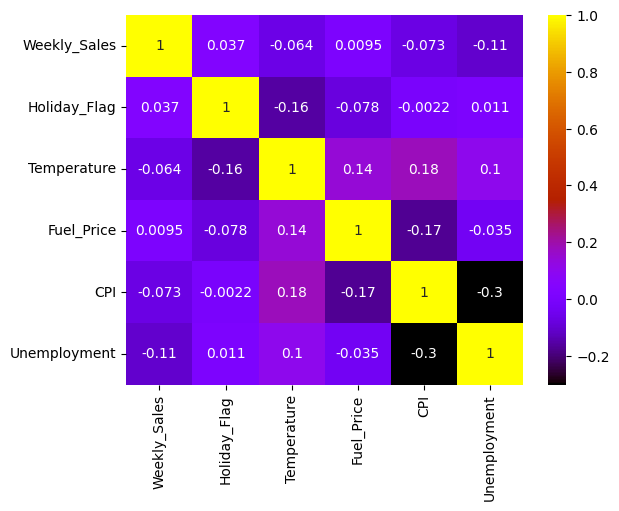

In [207]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='gnuplot')